Diana Itzel Soto Castañeda

Ciencia de datos para sensores inteligentes

# Exploración de técnicas de procesamiento de Audio

En este Notebook se exploran las librerías **SoundFile**, **Librosa** y **pyAudioAnalysis** de Python, aplicando algunas de sus herramientas para el procesamiento y análisis de audio.

Para esta exploración se utilizan dos grabaciones de la misma escala musical (Mi mayor) interpretada sobre el mismo pianoforte, capturadas con dos dispositivos de grabación distintos: un teléfono celular (Google Pixel 6a) y un micrófono externo (Maono AU-AO4) diseñado para aplicaciones de podcast.

Si bien el propósito principal de la tarea es familiarizarse con el uso de estas librerías, se aprovecha el ejemplo para realizar comparaciones adicionales entre ambas grabaciones, observando cómo diferentes dispositivos de adquisición pueden influir en la representación y análisis del audio de una misma señal musical.

El objetivo central de esta tarea es la exploración de las librerías de Python mencionadas; las comparaciones realizadas tienen un carácter descriptivo y se incluyen por interés personal.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display

from IPython.display import Audio, display
from pyAudioAnalysis import ShortTermFeatures

## Reproducción de archivos

In [21]:
display("Piano - Microfono Maono")
display(Audio("data/audio/piano_micr.wav"))

'Piano - Microfono Maono'

In [22]:
display("Piano - Smartphone")
display(Audio("data/audio/piano_phone.wav"))

'Piano - Smartphone'

## Carga de Audios con **SoundFile**
Los audios se cargan con **SoundFile** para evitar que la librería realice procesamiento durante la carga y así observar los efectos reales del sensor en los datos.

In [23]:

audio_phone_sf, sr_phone_sf = sf.read("data/audio/piano_phone.wav")
audio_mic_sf, sr_mic_sf = sf.read("data/audio/piano_micr.wav")

#Verificación de canales y tasa de muestreo
print("Phone audio shape:", audio_phone_sf.shape)
print("Phone sample rate:", sr_phone_sf)

print("Mic audio shape:", audio_mic_sf.shape)
print("Mic sample rate:", sr_mic_sf)

Phone audio shape: (481280, 2)
Phone sample rate: 48000
Mic audio shape: (330752,)
Mic sample rate: 48000


Observamos que el sensor del celular captura el audio **estéreo**, mientras que el sensor del micrófono captura el audio **monoéstereo**, además, ambos manejas diferente tasa de muestreo.

## Exploración de **Librosa**
La librería **Librosa** trabaja con datos monoesteréo, por lo cual se hace una conversión de los datos:

In [24]:
# Convertir a mono si el audio tiene más de una dimensión (más de un canal)
if audio_phone_sf.ndim > 1:
    audio_phone = librosa.to_mono(audio_phone_sf.T)
else:
    audio_phone = audio_phone_sf

if audio_mic_sf.ndim > 1:
    audio_mic = librosa.to_mono(audio_mic_sf.T)
else:
    audio_mic = audio_mic_sf


### 1. Visualización temporal de la señal de audio

#### Smartphone

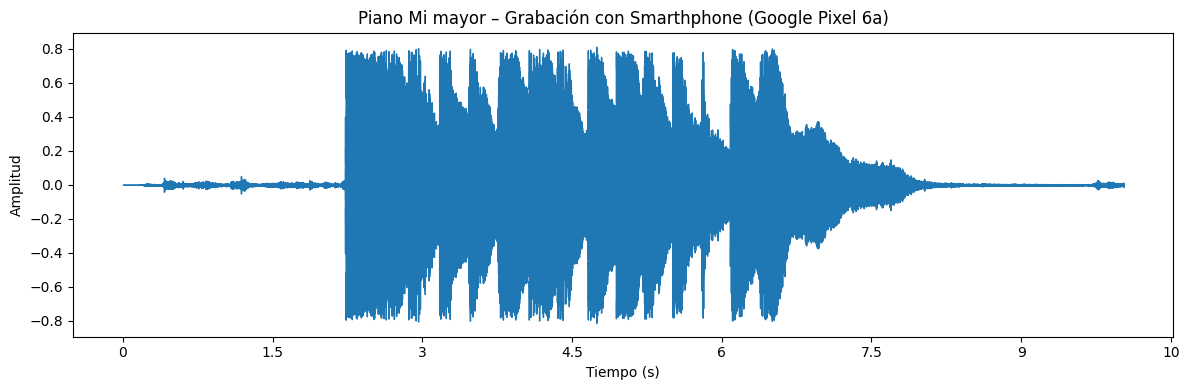

In [25]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_phone, sr=sr_phone_sf)
plt.title("Piano Mi mayor – Grabación con Smarthphone (Google Pixel 6a)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

#### Microfóno

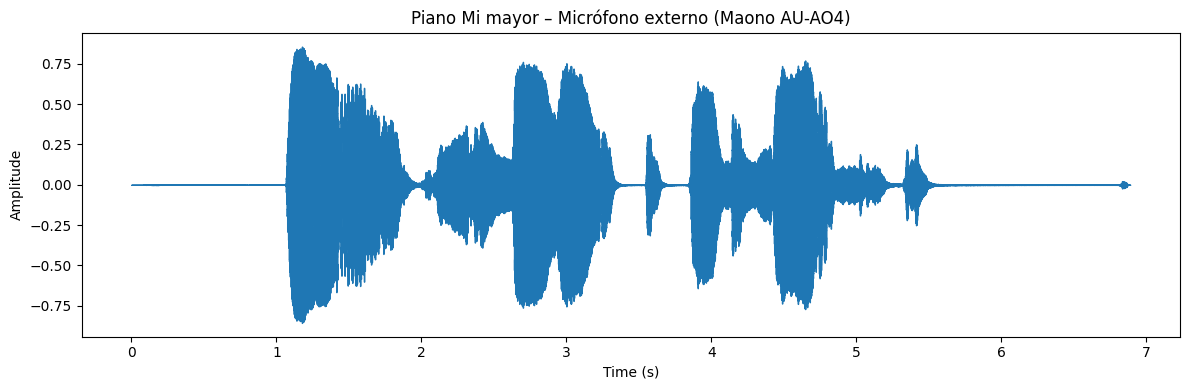

In [26]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_mic, sr=sr_mic_sf)
plt.title("Piano Mi mayor – Micrófono externo (Maono AU-AO4)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

La visualización temporal permite observar diferencias en la amplitud de ambas grabaciones. Puedo hacer algunas observaciones:

1. El celular captó más ruido de fondo.
2. El audio grabado por el celuar ha sido comprimido.
3. El microfono no es el adecuado para grabar música.

### 2. Espectrograma

#### Smarthphone

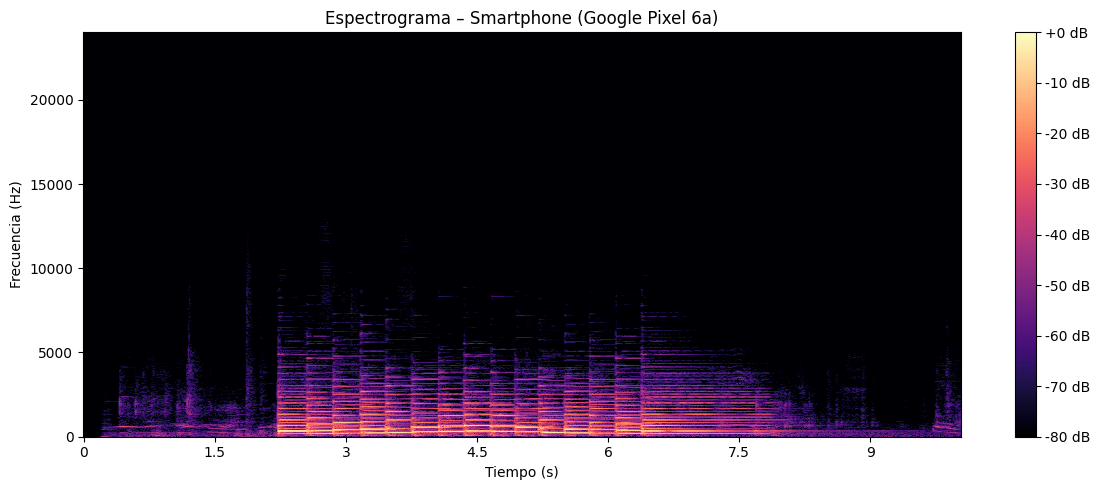

In [27]:
# Short-Time Fourier Transform (STFT)
S_phone = librosa.stft(audio_phone)

# Convertir a decibeles
S_phone_db = librosa.amplitude_to_db(np.abs(S_phone), ref=np.max)

# Visualizar
plt.figure(figsize=(12, 5))
librosa.display.specshow(
    S_phone_db,
    sr=sr_phone_sf,
    x_axis="time",
    y_axis="hz"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma – Smartphone (Google Pixel 6a)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.tight_layout()
plt.show()


#### Micrófono

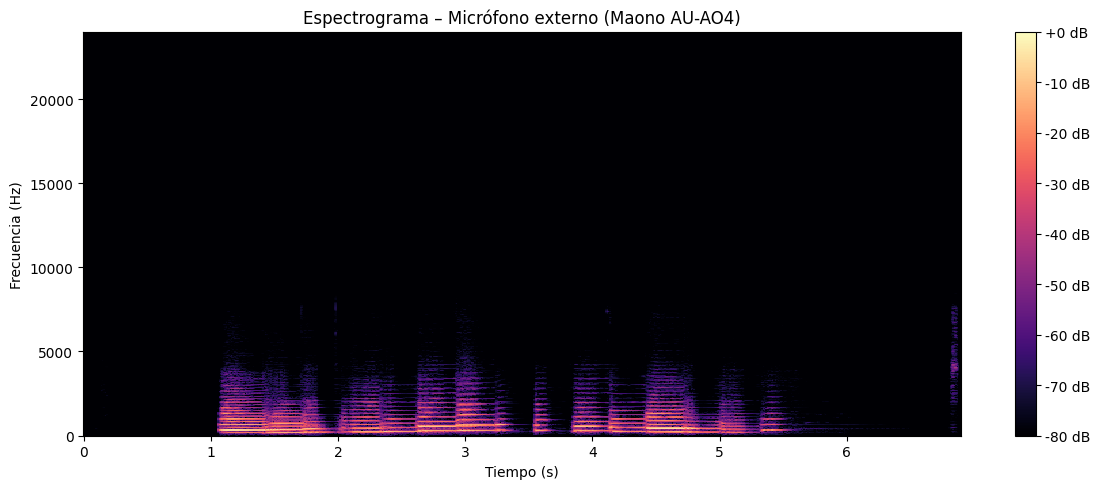

In [28]:
S_mic = librosa.stft(audio_mic)
S_mic_db = librosa.amplitude_to_db(np.abs(S_mic), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(
    S_mic_db,
    sr=sr_mic_sf,
    x_axis="time",
    y_axis="hz"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma – Micrófono externo (Maono AU-AO4)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.tight_layout()
plt.show()


La visualización de ambos espectrogramas me permite observar que el micrófono filtra componenetes frecuenciales de la señal —Recordando qué está opitimizado para voz por ser un micrófono de podcast—.

### 3. Centroide Espectral

#### Smarthphone

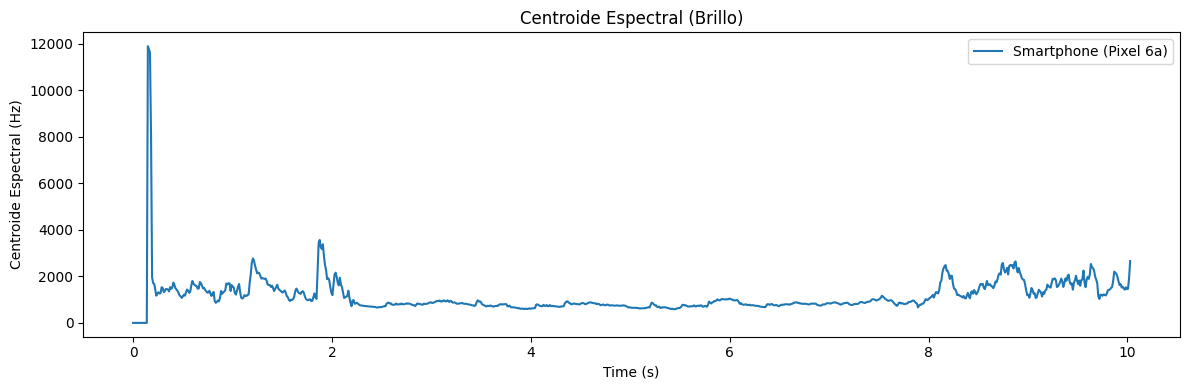

In [29]:
# Centroide espectral
centroid_phone = librosa.feature.spectral_centroid(
    y=audio_phone,
    sr=sr_phone_sf
)[0]

#Eje temporal
frames_phone = range(len(centroid_phone))
t_phone = librosa.frames_to_time(frames_phone, sr=sr_phone_sf)

#Visualización
plt.figure(figsize=(12, 4))
plt.plot(t_phone, centroid_phone, label="Smartphone (Pixel 6a)")
plt.xlabel("Time (s)")
plt.ylabel("Centroide Espectral (Hz)")
plt.title("Centroide Espectral (Brillo)")
plt.legend()
plt.tight_layout()
plt.show()


#### Micrófono

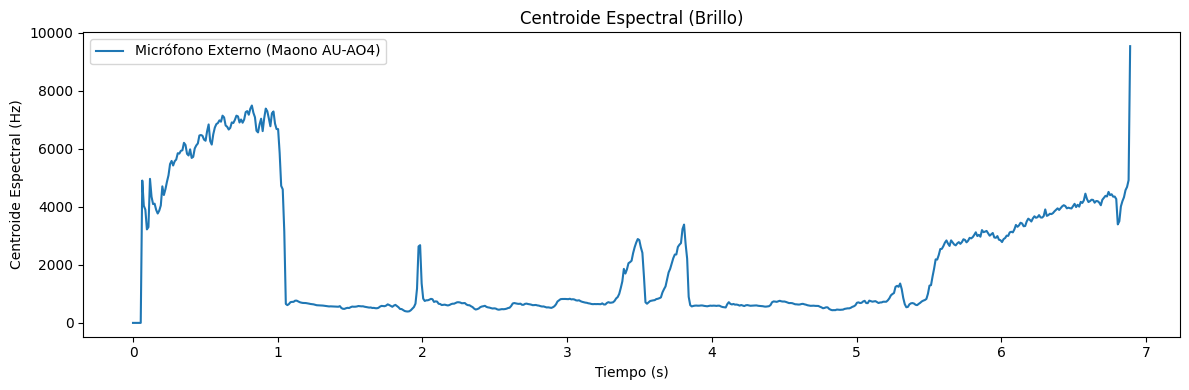

In [30]:
# Centroide espectral
centroid_mic = librosa.feature.spectral_centroid(
    y=audio_mic,
    sr=sr_mic_sf
)[0]

#Eje temporal
frames_mic = range(len(centroid_mic))
t_mic = librosa.frames_to_time(frames_mic, sr=sr_mic_sf)

#Visualización
plt.figure(figsize=(12, 4))
plt.plot(t_mic, centroid_mic, label="Micrófono Externo (Maono AU-AO4)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Centroide Espectral (Hz)")
plt.title("Centroide Espectral (Brillo)")
plt.legend()
plt.tight_layout()
plt.show()

Observamos como el celular tiene más energía en frecuencias altas, es decir, el celular realza los sonidos agudos del piano.

## Exploración de **pyAudioAnalysis**

Se extraen las características(*features*) de las señales para usarlas como herramienta exploratoria en la librería **pyAudioAnalysis**

In [31]:
features_phone, feature_names = ShortTermFeatures.feature_extraction(
    audio_phone,
    sr_phone_sf,
    0.05 * sr_phone_sf,   # ventana 50 ms
    0.025 * sr_phone_sf   # hop 25 ms
)

features_mic, _ = ShortTermFeatures.feature_extraction(
    audio_mic,
    sr_mic_sf,
    0.05 * sr_mic_sf,
    0.025 * sr_mic_sf
)
feature_names

['zcr',
 'energy',
 'energy_entropy',
 'spectral_centroid',
 'spectral_spread',
 'spectral_entropy',
 'spectral_flux',
 'spectral_rolloff',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'chroma_1',
 'chroma_2',
 'chroma_3',
 'chroma_4',
 'chroma_5',
 'chroma_6',
 'chroma_7',
 'chroma_8',
 'chroma_9',
 'chroma_10',
 'chroma_11',
 'chroma_12',
 'chroma_std',
 'delta zcr',
 'delta energy',
 'delta energy_entropy',
 'delta spectral_centroid',
 'delta spectral_spread',
 'delta spectral_entropy',
 'delta spectral_flux',
 'delta spectral_rolloff',
 'delta mfcc_1',
 'delta mfcc_2',
 'delta mfcc_3',
 'delta mfcc_4',
 'delta mfcc_5',
 'delta mfcc_6',
 'delta mfcc_7',
 'delta mfcc_8',
 'delta mfcc_9',
 'delta mfcc_10',
 'delta mfcc_11',
 'delta mfcc_12',
 'delta mfcc_13',
 'delta chroma_1',
 'delta chroma_2',
 'delta chroma_3',
 'delta chroma_4',
 'delta chroma_5',
 'delta chroma_6',
 'delta chro

### 4. Energía

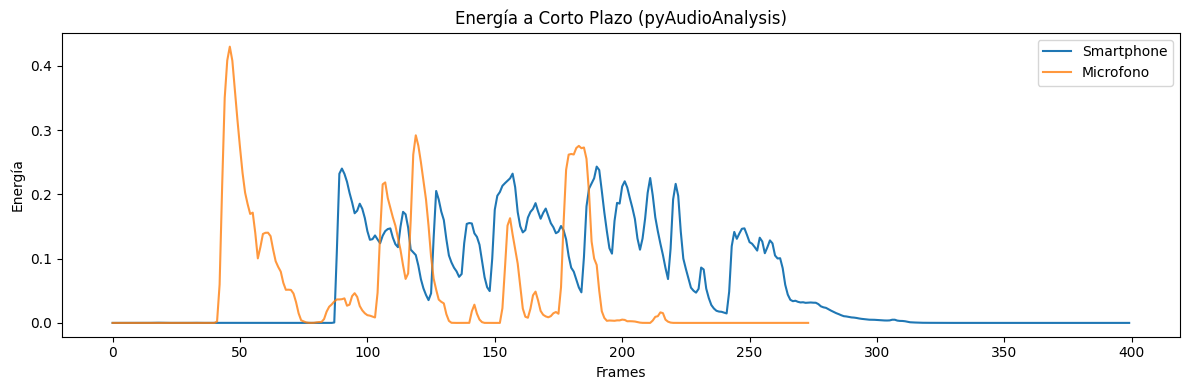

In [32]:
energy_idx = feature_names.index("energy")

plt.figure(figsize=(12,4))
plt.plot(features_phone[energy_idx], label="Smartphone")
plt.plot(features_mic[energy_idx], label="Microfono", alpha=0.8)
plt.title("Energía a Corto Plazo (pyAudioAnalysis)")
plt.xlabel("Frames")
plt.ylabel("Energía")
plt.legend()
plt.tight_layout()
plt.show()


La grabación realizada con el micrófono externo refleja de manera más fiel el decaimiento natural del sonido del instrumento. En el piano, el sonido se origina mediante un mecanismo de percusión, lo que da lugar a un decaimiento característico que forma parte esencial de su timbre. Aunque el micrófono está optimizado para el rango de la voz humana, conserva mejor la dinámica temporal de la señal en comparación con la grabación del teléfono celular, en la cual se observa un mayor nivel de compresión, lo que atenúa parcialmente el timbre del piano.

### 5. Flujo espectral

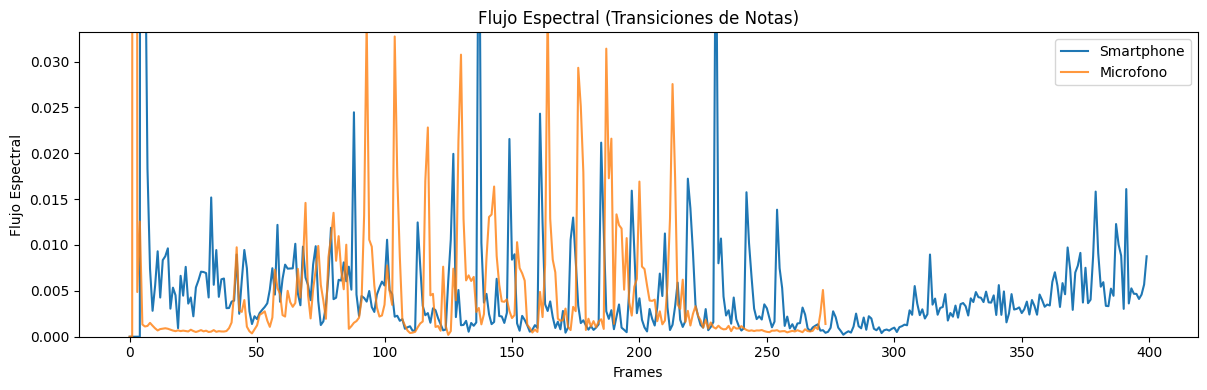

In [38]:
flux_idx = feature_names.index("spectral_flux")

plt.figure(figsize=(12,4))
plt.plot(features_phone[flux_idx], label="Smartphone")
plt.plot(features_mic[flux_idx], alpha=0.8, label="Microfono")
plt.title("Flujo Espectral (Transiciones de Notas)")
plt.xlabel("Frames")
plt.ylabel("Flujo Espectral")
plt.legend()
plt.tight_layout()
# Quitar valores atípicos en el eje y para mejor visualización)
max_flux = max(
    np.percentile(features_phone[flux_idx], 99),
    np.percentile(features_mic[flux_idx], 99)
)

plt.ylim(0, max_flux)
plt.show()


En el caso de la escala de piano analizada, el flujo espectral muestra picos claramente asociados a las transiciones entre notas. La comparación entre dispositivos sugiere que el micrófono externo preserva mejor las microvariaciones espectrales, mientras que la grabación del teléfono presenta transiciones más uniformes.

## Conclusión

Este ejercicio me permitió visualizar la música desde una perspectiva distinta, mostrando cómo las técnicas de exploración de datos pueden revelar características del sonido que no son evidentes únicamente a través de la escucha. Además, fue posible evaluar el comportamiento de distintos sensores de grabación y su impacto en la calidad de la señal. 
El uso de herramientas de ciencia de datos se presenta como un apoyo para el análisis y la comparación objetiva de señales acústicas. Cabe mencionar, que este ejercicio despertó un mayor interés por la captura musical y el uso de micrófonos especializados.